In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from scipy.integrate import odeint
sns.set()
%matplotlib inline

In [9]:
t = 0;dt = 0.003; s4 = 0;
chi=2; ci=chi; s5=0.7; factive=0.2; s7=0.01; s6=1-factive-s7-s4;
tnow =[]
ixnow = []
for i in range(1,150000+1):
    t = t + dt
    ni = 0
    if t>30 and t<60:
        ni = 100
        ci = chi
    if t>60 and t<90:
        ni = 0
        ci = 0
    if t>90 and t<130:
        ni = 100
        ci = 0
    if t>130 and t<160:
        ni = 100
        ci = chi
    if t>160 and t<190:
        ni = 100
        ci = 0
    if t>190 and t<220:
        ni = 100
        ci = chi
    if t>220 and t<250:
        ni = 100
        ci = 0
    if t>250 and t<280:
        ni = 0
        ci = chi
    if t>280 and t<310:
        ni = 100
        ci = 0
    if t>310 and t<340:
        ni = 0
        ci = 0
    if t>340 and t<370:
        ni = 100
        ci = 0
    if t>370 and t<400:
        ni = 0
        ci = 0
    if t>400 and t<430:
        ni = 100
        ci = chi
    if t>430 and t<460:
        ni = 0
        ci = 0
        
        
    f3n=ni**2.5/(ni**2.5+17**2.5)
    kcon1=0.1
    kcoff1=0.05
    kcon2=20 
    kcoff2=0.3
    kinact=0.2 
    #kinact=1
    #kinact=0.001 
    #kinact=1
    #kinact=0.2
    
    s5=s5+ (s6*ci*kcon1-s5*kcoff1+factive*f3n*kinact-s5*0.3) *dt
    factive=factive+(s7*ci*kcon2-factive*kcoff2+s5*0.15-factive*f3n*kinact)*dt
    s7=s7+(factive*kcoff2+s6*0.1-s7*ci*kcon2-s7*f3n*kinact*25)*dt
    s6=1-s5-factive-s7
    
    incx=factive*f3n
    tnow.append(t)
    ixnow.append(incx)


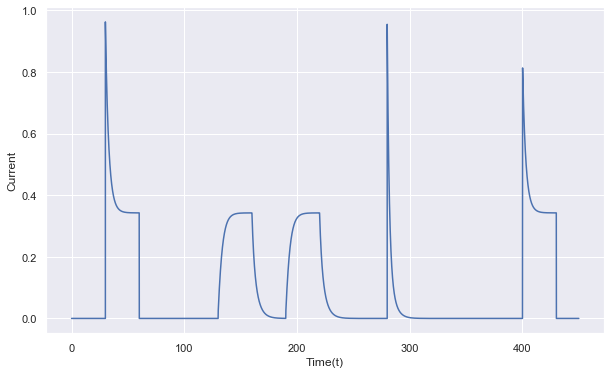

In [10]:
plt.figure(figsize = [10,6])
plt.plot(tnow,ixnow)
plt.xlabel("Time(t)")
plt.ylabel("Current")
plt.show()

### Na-dependent inactivation dictates activation by Ca

In [19]:
ni = 40
cinow = []
ixnow = []
for i in range(1,1001):
    logci = -(8-i/300)
    ci = 10**(logci)*1000000
    f3n = ni**2.5/(ni**2.5+17**2.5)
    kcon1 = 0.1
    kcoff1 = 0.05
    kcon2 = 20
    kcoff2 = 0.3
    #kinact = 0
    #kinact = 0.03
    #kinact = 0.1
    #kinact = 0.3
    kinact = 1
    
    k2 = ci*kcon1
    k1 = kcoff1
    k5 = ci*kcon2
    k6 = kcoff2
    k8 = 0.3
    k7 = f3n*kinact
    k3 = 0.1
    k4 = f3n*kinact*25
    
    
    x1 = k2*k4*(k7+k6)+k5*k7*(k2+k3)
    x2 = k1*k7*(k4+k5)+k4*k6*(k1+k8)
    x3 = k1*k3*(k7+k6)+k8*k6*(k2+k3)
    x4 = k2*k8*(k4+k5)+k3*k5*(k1+k8)
    d = x1+x2+x3+x4
    
    e1 = x1/d
    e2 = x2/d
    e3 = x3/d
    e4 = x4/d
    incx = e4*f3n
    cinow.append(logci)
    ixnow.append(incx)
    


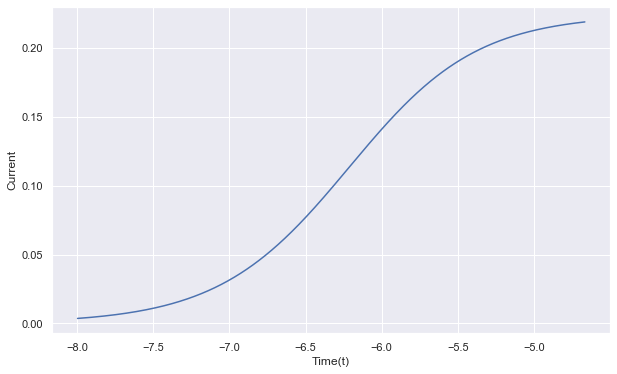

In [20]:
plt.figure(figsize = [10,6])
plt.plot(cinow,ixnow)
plt.xlabel("Time(t)")
plt.ylabel("Current")
plt.show()